# Tracing plastic in the Indian Ocean

We use the parcels package with surface currents from OSCAR to evolve particles backwards in time from the Seychelles and Aldabra.

Island locations: Aldabra = 46.3E, 9.4S; Seychelles = 4.5S, 55.6E

In [9]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta, datetime
from operator import attrgetter

In [10]:
# Load in the data
filenames = {'U': "/work/gam/oscar/oscar_vel201*.nc",
             'V': "/work/gam/oscar/oscar_vel201*.nc"}
variables = {'U': 'u',
             'V': 'v'}
dimensions = {'lat': 'latitude',
              'lon': 'longitude',
              'time': 'time'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions);

In [11]:
# Define particle set
pset = ParticleSet.from_line(fieldset=fieldset, pclass=JITParticle,
                             size=2000,           # releasing N particles
                             start=(55, -4.5),   # releasing on a line: the start longitude and latitude
                             finish=(56, -4.5),  # releasing on a line: the end longitude and latitude
                             time=datetime(2017, 12, 31, 0))  # releasing at a certain time

In [12]:
# Calculate trajectories
pset.execute(AdvectionRK4,
             runtime=timedelta(days=720),
             dt=-timedelta(minutes=5),
             output_file=pset.ParticleFile(name="seychelles.nc", outputdt=timedelta(days=5)));

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-20354/a55aa0913994dc8876ab4bf2b91a6615.so
100% (62208000.0 of 62208000.0) |########| Elapsed Time: 0:10:04 Time:  0:10:04


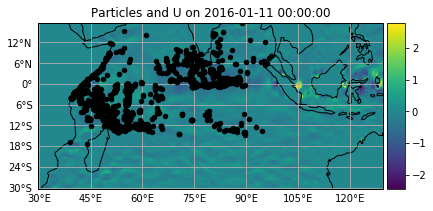

In [13]:
pset.show(domain=[18, -30, 130, 30],
         field=fieldset.U)

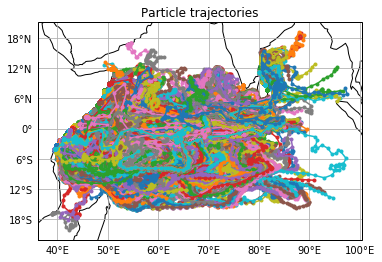

In [15]:
ax=plotTrajectoriesFile('seychelles.nc');